### Let's see what this looks like 

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import datetime
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### I'll be testing functions on this abbreviated chunk of one file

In [2]:
test_df = pd.read_csv('data/2017-fordgobike-tripdata.csv').head(3000)

In [32]:
test_df.info() ##ELABORATE LATER, THURSDAY AFT?FRIDAY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
duration_sec               1000 non-null int64
start_time                 1000 non-null object
end_time                   1000 non-null object
start_station_id           1000 non-null int64
start_station_name         1000 non-null object
start_station_latitude     1000 non-null float64
start_station_longitude    1000 non-null float64
end_station_id             1000 non-null int64
end_station_name           1000 non-null object
end_station_latitude       1000 non-null float64
end_station_longitude      1000 non-null float64
bike_id                    1000 non-null int64
user_type                  1000 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 101.7+ KB


In [5]:
folder = 'pickle/'
files = sorted([folder+file for file in os.listdir(folder) if not file.startswith('.')])

### THERE IS JUST OVER 1GB OF DATA ACROSS 27 CSV'S AND WE WON'T BE ABLE TO CONCAT THIS ALL INTO 1 DATAFRAME
#### I'LL WRITE FUNCTIONS THAT WILL BE CALLED ON INDIVIDUAL DFs
#### >FIRST WE'LL WANT TO CHECK TO SEE IF OUR THE MOST IMPORTANT COLUMNS HAVE NULL VALUES TO BE CLEANED

In [67]:
from src.pickle_load import BikeData
from src.data_funcs import *
from src.plot_funcs import *

In [10]:
bike_data = BikeData(files)

In [11]:
bike_data.do_on_all(check_problem_columns) #Should process and not show anything if there are no nulls

##### everything seems to be in working order -- GREAT

In [ ]:
bike_trips_per_month = bike_data.do_on_all(rentals_per_month)

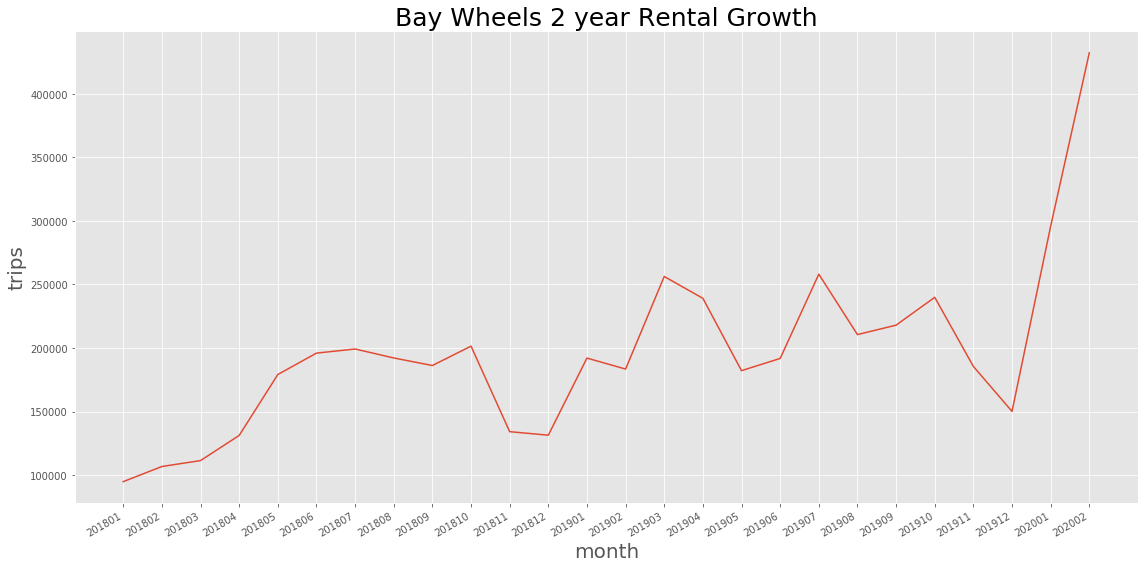

In [58]:
plot_chart(bike_trips_per_month, 'Bay Wheels 2 year Rental Growth', y_name='trips')

#### looks like they're growing and had a HUGE february

In [81]:
fleet_per_month = bike_data.do_on_all(bikes_per_month)

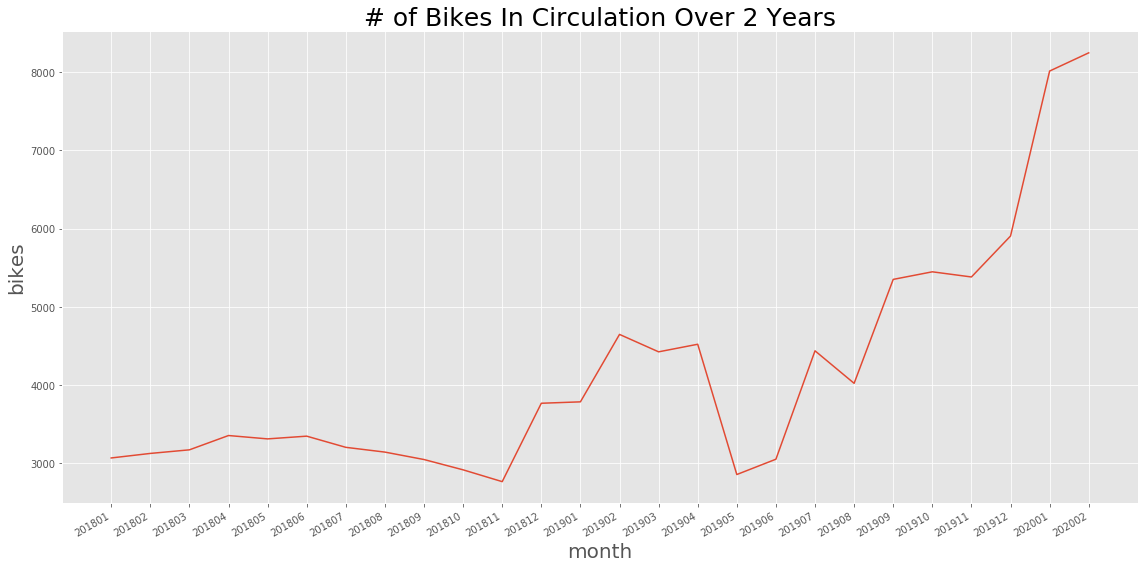

In [82]:
plot_chart(fleet_per_month, '# of Bikes In Circulation Over 2 Years', y_name='bikes')

In [80]:
from scipy import stats
stats.ttest_ind(list(bike_trips_per_month.values()), list(fleet_per_month.values()))

Ttest_indResult(statistic=14.498834716766375, pvalue=1.533006853057516e-19)

In [16]:
bike_data.do_on_all(weekend_averages)

201801
Total Weekend Trips: 15705 | expected:  24465
Total Weekday Trips: 79097 | expected:  70336
Most popular day was on: 1 | Least popular day was on: 0
201802
Total Weekend Trips: 17600 | expected:  30490
Total Weekday Trips: 89118 | expected:  76227
Most popular day was on: 3 | Least popular day was on: 6
201803
Total Weekend Trips: 19478 | expected:  32336
Total Weekday Trips: 91904 | expected:  79045
Most popular day was on: 3 | Least popular day was on: 5
201804
Total Weekend Trips: 24819 | expected:  39350
Total Weekday Trips: 106350 | expected:  91818
Most popular day was on: 2 | Least popular day was on: 4
201805
Total Weekend Trips: 28679 | expected:  46225
Total Weekday Trips: 150446 | expected:  132899
Most popular day was on: 3 | Least popular day was on: 6
201806
Total Weekend Trips: 37835 | expected:  58790
Total Weekday Trips: 158133 | expected:  137177
Most popular day was on: 1 | Least popular day was on: 6
201807
Total Weekend Trips: 37027 | expected:  57838
Total 

#### Surprised to see that without fail, weekend trips are proportionally less than weekdays!
## will come back to this later


In [17]:
test_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


## 

In [33]:
bike_data.do_on_all(distance_calculations)

201801
Average Trip: 1.01 miles
# of Short Trips: 2226
201802
Average Trip: 1.00 miles
# of Short Trips: 2656
201803
Average Trip: 0.98 miles
# of Short Trips: 2969
201804
Average Trip: 0.98 miles
# of Short Trips: 4276
201805
Average Trip: 0.98 miles
# of Short Trips: 5953
201806
Average Trip: 0.98 miles
# of Short Trips: 7662
201807
Average Trip: 0.98 miles
# of Short Trips: 8216
201808
Average Trip: 0.99 miles
# of Short Trips: 6258
201809
Average Trip: 0.99 miles
# of Short Trips: 5749
201810
Average Trip: 1.00 miles
# of Short Trips: 5118
201811
Average Trip: 0.98 miles
# of Short Trips: 3043
201812
Average Trip: 1.01 miles
# of Short Trips: 3679
201901
Average Trip: 1.05 miles
# of Short Trips: 4652
201902
Average Trip: 1.05 miles
# of Short Trips: 3953
201903
Average Trip: 1.09 miles
# of Short Trips: 6908
201904
Average Trip: 1.70 miles
# of Short Trips: 6032
201905
Average Trip: 1.03 miles
# of Short Trips: 4149
201906
Average Trip: 1.04 miles
# of Short Trips: 5231
201907
Ave

In [41]:
bike_data.do_on_all(subscribers_per_month)

201801 : 0.87
201802 : 0.86
201803 : 0.85
201804 : 0.84
201805 : 0.84
201806 : 0.83
201807 : 0.83
201808 : 0.84
201809 : 0.84
201810 : 0.87
201811 : 0.89
201812 : 0.87
201901 : 0.88
201902 : 0.89
201903 : 0.86
201904 : 0.85
201905 : 0.86
201906 : 0.83
201907 : 0.83
201908 : 0.78
201909 : 0.76
201910 : 0.77
201911 : 0.77
201912 : 0.52
202001 : 0.58
202002 : 0.64


In [ ]:
### Looks like there's been a shift in advertising